In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Q.1: Import data and check null values, column info, and descriptive statistics of the dat

In [ ]:
df = pd.read_csv("/content/userbehaviour.csv")

In [ ]:
df.head(4)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed


In [ ]:
df.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [ ]:
df.shape

(999, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


Q.2: Check the highest, lowest, and average screen time of all the users.


In [ ]:
print('highest screem time is: ',df['Average Screen Time'].max())
print('lowest screem time is: ',df['Average Screen Time'].min())
print('avg screem time is: ',df['Average Screen Time'].mean())

highest screem time is:  50.0
lowest screem time is:  0.0
avg screem time is:  24.39039039039039


Q.3: Check the highest, lowest, and the average amount spent by all the users

In [ ]:
print('highest amount spent is: ',df["Average Spent on App (INR)"].max())
print('lowest amount spent is: ',df["Average Spent on App (INR)"].min())
print('avg amount spent is: ',df["Average Spent on App (INR)"].mean())

highest amount spent is:  998.0
lowest amount spent is:  0.0
avg amount spent is:  424.4154154154154


Q.4: Now check the relationship between the spending capacity and screen time of the active users
and the users who have uninstalled the app. Also explain your observation

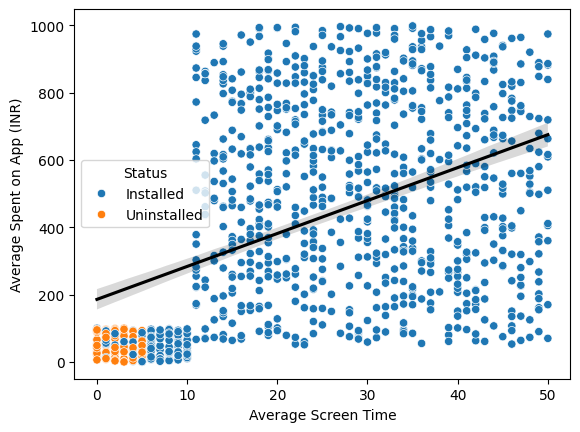

In [ ]:
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)',hue='Status',data=df)
sns.regplot(x='Average Screen Time', y='Average Spent on App (INR)',scatter=False,color='black',data=df)
plt.show()

In [ ]:
df[df['Status']=='Uninstalled'].shape[0]

83

In [ ]:
df[df['Status']=='Installed'].shape[0]

916

Q.5: Now check the relationship between the ratings given by users and the average screen time.
Also explain your observation.

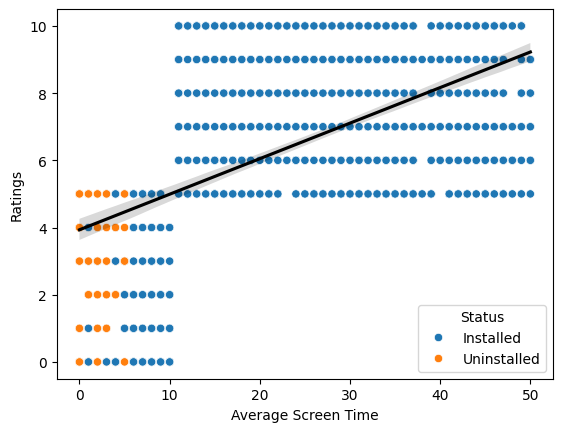

In [ ]:
sns.scatterplot(x='Average Screen Time', y='Ratings',hue='Status',data=df)
sns.regplot(x='Average Screen Time', y='Ratings',scatter=False,color='black',data=df)
plt.show()


Q.6: Now move forward to App User segmentation to find the users that the app retained and
lost forever. You can use the K-means clustering algorithm in Machine Learning for this task.
Also, tell the number of segments you have got.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
col_trans = ColumnTransformer(transformers=[
    ('trf', OneHotEncoder(drop='first', sparse=False), ['Status'])
], remainder='passthrough')

In [ ]:
df = col_trans.fit_transform(df)
feature_names = col_trans.get_feature_names_out()
df = pd.DataFrame(df,columns=feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df

,trf__Status_Uninstalled,remainder__userid,remainder__Average Screen Time,remainder__Average Spent on App (INR),remainder__Left Review,remainder__Ratings,remainder__New Password Request,remainder__Last Visited Minutes
0,0.0,1001.0,17.0,634.0,1.0,9.0,7.0,2990.0
1,1.0,1002.0,0.0,54.0,0.0,4.0,8.0,24008.0
2,0.0,1003.0,37.0,207.0,0.0,8.0,5.0,971.0
3,0.0,1004.0,32.0,445.0,1.0,6.0,2.0,799.0
4,0.0,1005.0,45.0,427.0,1.0,5.0,6.0,3668.0
...,...,...,...,...,...,...,...,...
994,0.0,1995.0,38.0,938.0,0.0,5.0,4.0,1865.0
995,0.0,1996.0,43.0,61.0,0.0,6.0,8.0,1327.0
996,0.0,1997.0,47.0,761.0,0.0,6.0,1.0,1936.0
997,0.0,1998.0,6.0,73.0,1.0,5.0,1.0,3436.0


In [ ]:
df

,trf__Status_Uninstalled,remainder__userid,remainder__Average Screen Time,remainder__Average Spent on App (INR),remainder__Left Review,remainder__Ratings,remainder__New Password Request,remainder__Last Visited Minutes
0,0.0,1001.0,17.0,634.0,1.0,9.0,7.0,2990.0
1,1.0,1002.0,0.0,54.0,0.0,4.0,8.0,24008.0
2,0.0,1003.0,37.0,207.0,0.0,8.0,5.0,971.0
3,0.0,1004.0,32.0,445.0,1.0,6.0,2.0,799.0
4,0.0,1005.0,45.0,427.0,1.0,5.0,6.0,3668.0
...,...,...,...,...,...,...,...,...
994,0.0,1995.0,38.0,938.0,0.0,5.0,4.0,1865.0
995,0.0,1996.0,43.0,61.0,0.0,6.0,8.0,1327.0
996,0.0,1997.0,47.0,761.0,0.0,6.0,1.0,1936.0
997,0.0,1998.0,6.0,73.0,1.0,5.0,1.0,3436.0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(df)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['clusters']= labels

In [ ]:
df.head()

,trf__Status_Uninstalled,remainder__userid,remainder__Average Screen Time,remainder__Average Spent on App (INR),remainder__Left Review,remainder__Ratings,remainder__New Password Request,remainder__Last Visited Minutes,clusters
0,0.0,1001.0,17.0,634.0,1.0,9.0,7.0,2990.0,0
1,1.0,1002.0,0.0,54.0,0.0,4.0,8.0,24008.0,2
2,0.0,1003.0,37.0,207.0,0.0,8.0,5.0,971.0,0
3,0.0,1004.0,32.0,445.0,1.0,6.0,2.0,799.0,0
4,0.0,1005.0,45.0,427.0,1.0,5.0,6.0,3668.0,0


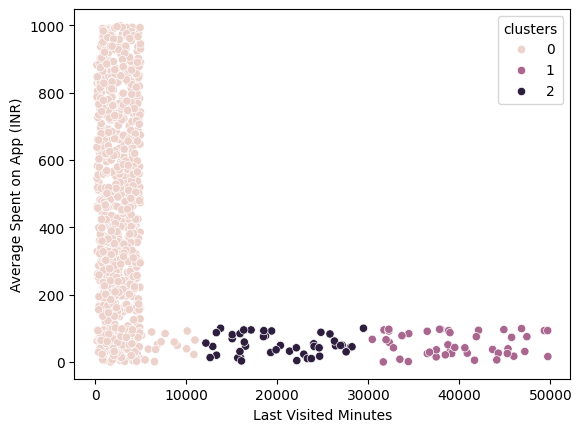

In [ ]:
sns.scatterplot(x='remainder__Last Visited Minutes',y='remainder__Average Spent on App (INR)',hue='clusters',data=df)
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.show()